## Boston Housin Price Prediction

## Dataset Explanation
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms. However, these comparisons were primarily done outside of Delve and are thus somewhat suspect. The dataset is small in size with only 506 cases.

There are 14 attributes in each case of the dataset. They are:
- **CRIM** - per capita crime rate by town
- **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS** - proportion of non-retail business acres per town.
- **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- **NOX** - nitric oxides concentration (parts per 10 million)
- **RM** - average number of rooms per dwelling
- **AGE** - proportion of owner-occupied units built prior to 1940
- **DIS** - weighted distances to five Boston employment centres
- **RAD** - index of accessibility to radial highways
- **TAX** - full-value property-tax rate per 10,000 USD
- **PTRATIO** - pupil-teacher ratio by town
- **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT** - % lower status of the population
- **MEDV** - Median value of owner-occupied homes in 1000's USD

In the above mentioned 14 attributes, `MEDV` is a target or label attribute and other 13 attributes are considered as `features`. 


## Required Libraries

- **Numpy** - Used for matrix computation and statistical work.
- **Pandas** - Used for reaading and savind datasets, and it is also used in some other computational tasks.
- **Seaborn** - Used for visualizations
- **Matplotlib** - Used for visualizations
- **Sklearn** - Used for ML models, data scalling and loading boston dataset

In [115]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

## Loading Dataset
In the figure below we will load the dataset by using sklearn library. After loading the dataset we will print out the number of rows in the dataset

In [117]:
from sklearn.datasets import load_boston
boston = load_boston()

print("Total Nmber of Rows in the dataset: ", boston.data.shape[0])

Total Nmber of Rows in the dataset:  506


Setting up up boston housing dataset and plotting it. For setting up the dataset we will be using pandas library to create a new dataframe.

- **boston.data** - Here we have all the data for features.
- **boston.target** - Here we have all the data for target variable (MDEV).
- **boston.feature_names** - Here we have the column names for features in numpy array, so for using it first we will convert it to a list by using `to_list()` function


In the last we will create a new dataframe by using `DataFrame` class provided by pandas library.

In [124]:
features_data = boston.data
target_data = boston.target
features = boston.feature_names.tolist()

boston_dataset = pd.DataFrame(data=boston.data, index=list(range(len(features_data))), columns=features)
boston_dataset["MEDV"] = boston.target
boston_dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Saving Datasets
In the code segments below we will save the whole boston dataset into a csv file

In [125]:
# saving the complete dataset
boston_dataset.to_csv("boston.csv")

In the code segment below we will be spliting features and labels from the dataset

In [127]:
# Spliting the dataset
features = boston_dataset.drop("MEDV", axis=1)
label = boston_dataset["MEDV"]

## Spliting Training and testing set
In the code segment below we will `train_test_split` function provided by sklearn library to split the dataset, we will use **80% data for training** and **20% data for testing**

In [128]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2)

In [129]:
print("Number of Rows in the whole dataset: ", boston_dataset.shape[0])
print("Number of Rows in the training dataset: ", X_train.shape[0])
print("Number of Rows in the testing dataset: ", X_test.shape[0])

Number of Rows in the whole dataset:  506
Number of Rows in the training dataset:  404
Number of Rows in the testing dataset:  102


## Saving Training and Testing sets
Now we will save training and testing sets into seperate csv files, and for saving them first we will merge the label column so then we have complete dataset when we will read it.

In [133]:
# saving training dataset
X_train["MEDV"] = y_train
X_train.to_csv("boston_training.csv")
X_train = X_train.drop("MEDV", axis=1)

In [134]:
# saving testing dataset
X_test["MEDV"] = y_test
X_test.to_csv("boston_test.csv")
X_test = X_test.drop("MEDV", axis=1)

## Getting Statistics Part (c)
In the code section below we will visualize the statistics of the dataset by using `describe` function from pandas library

In [135]:
# Statistics about training dataset
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


## Data Analysis Part (d)
In this section we will use visualization techniques to visualize the dataset, first of all we will do correlation analysis and then we will plot it in the heatmap.

For calculation we will be using `corr` function provided by **pandas** library to calucalte the correlation between the variables after finding them we will use `seaborn` library to plot the heatmap


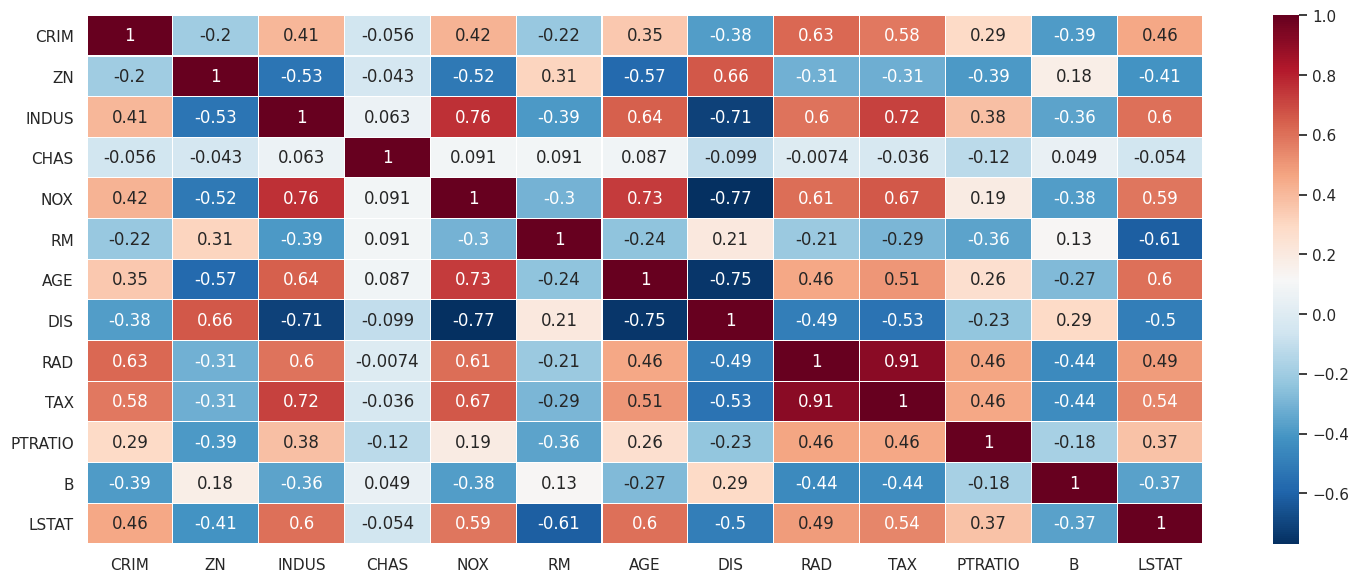

In [136]:
# correlation Analysis
correlation_analysis = features.corr()

# Plotting a heatmap for correlation analysis
sb.set(rc={"figure.figsize":(18, 7)})
sb.heatmap(correlation_analysis,
           xticklabels=correlation_analysis.columns,
           yticklabels=correlation_analysis.columns,
           cmap="RdBu_r",
           annot=True,
           linewidth=0.1)

## Histogram
In the section below we will plot histograms for different features, we will use `seaborn` library for plotting the histograms

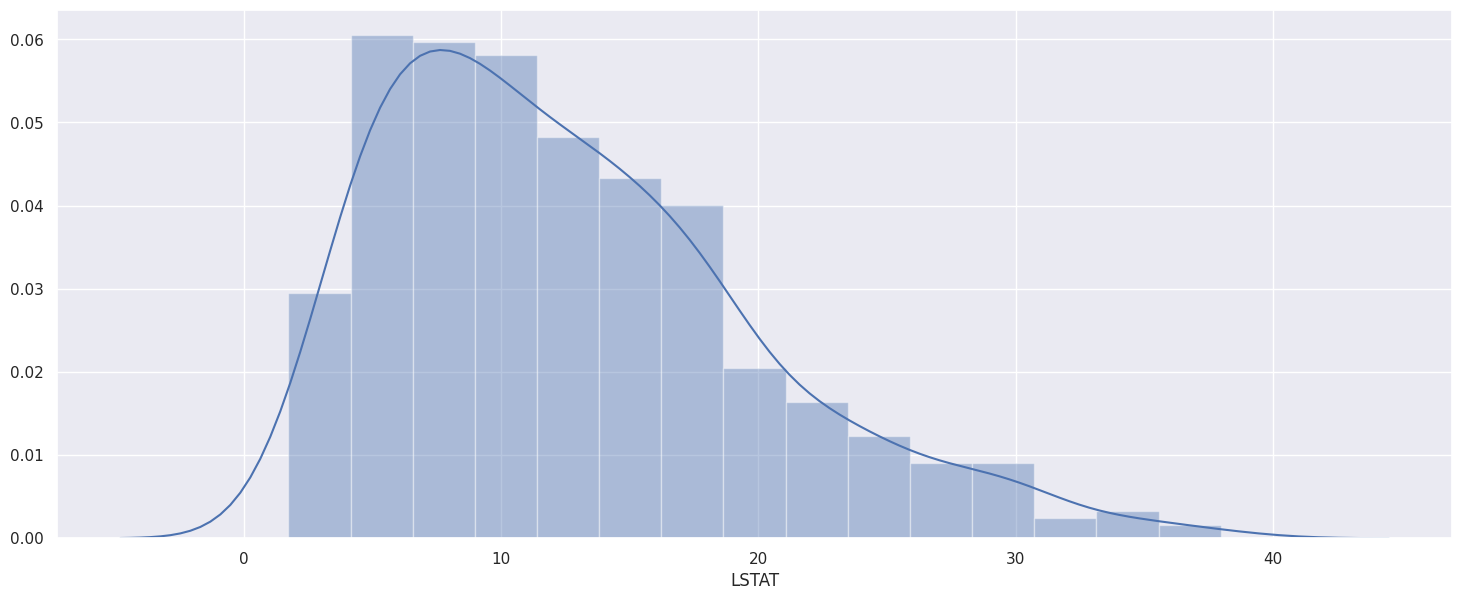

In [137]:
sb.distplot(features["LSTAT"])

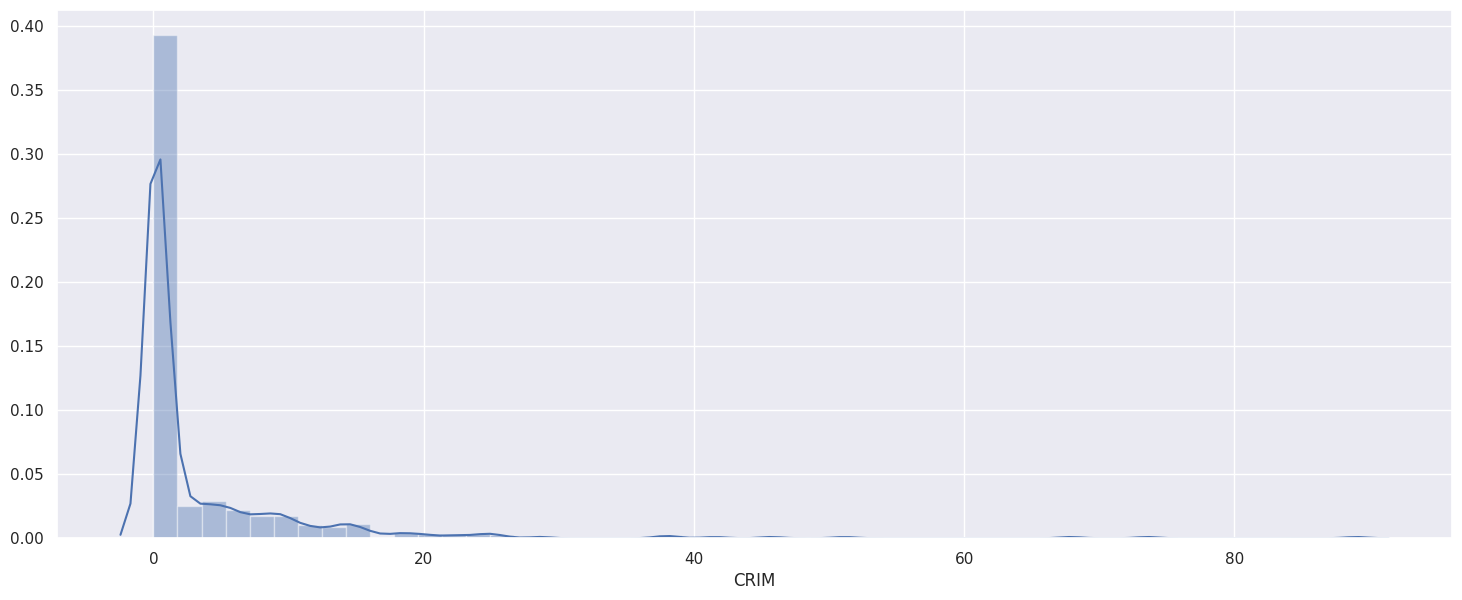

In [138]:
sb.distplot(features["CRIM"])

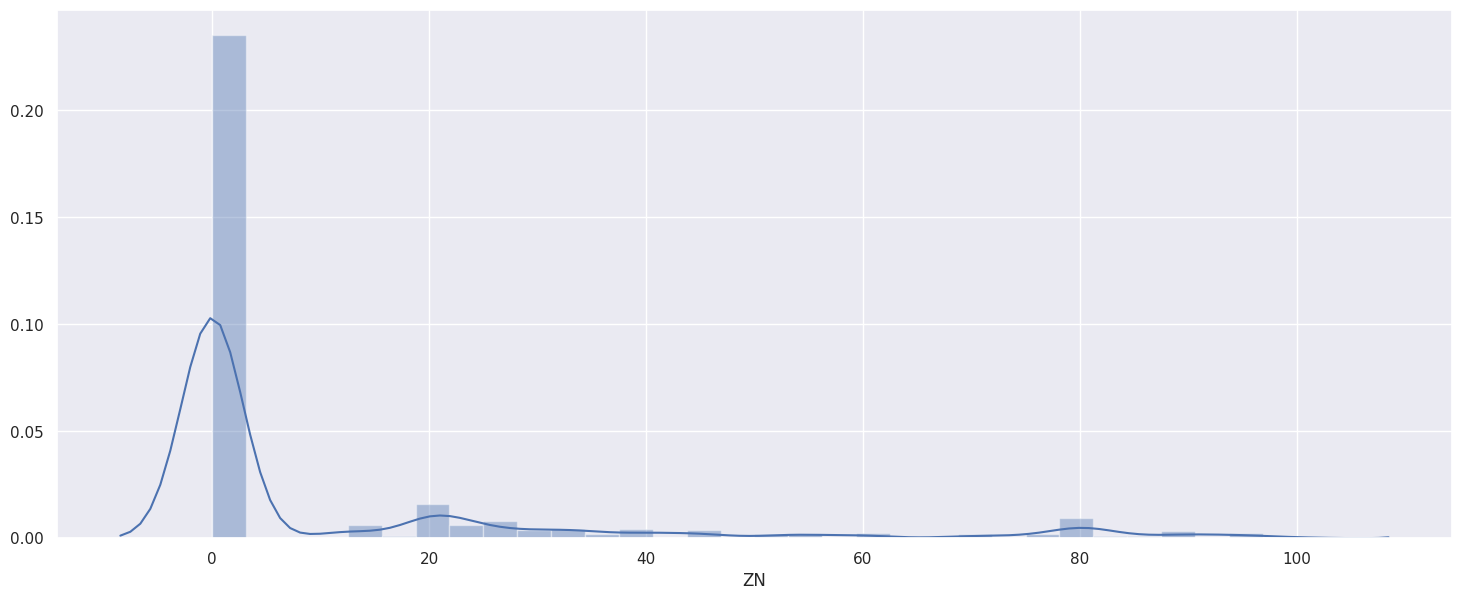

In [139]:
sb.distplot(features["ZN"])

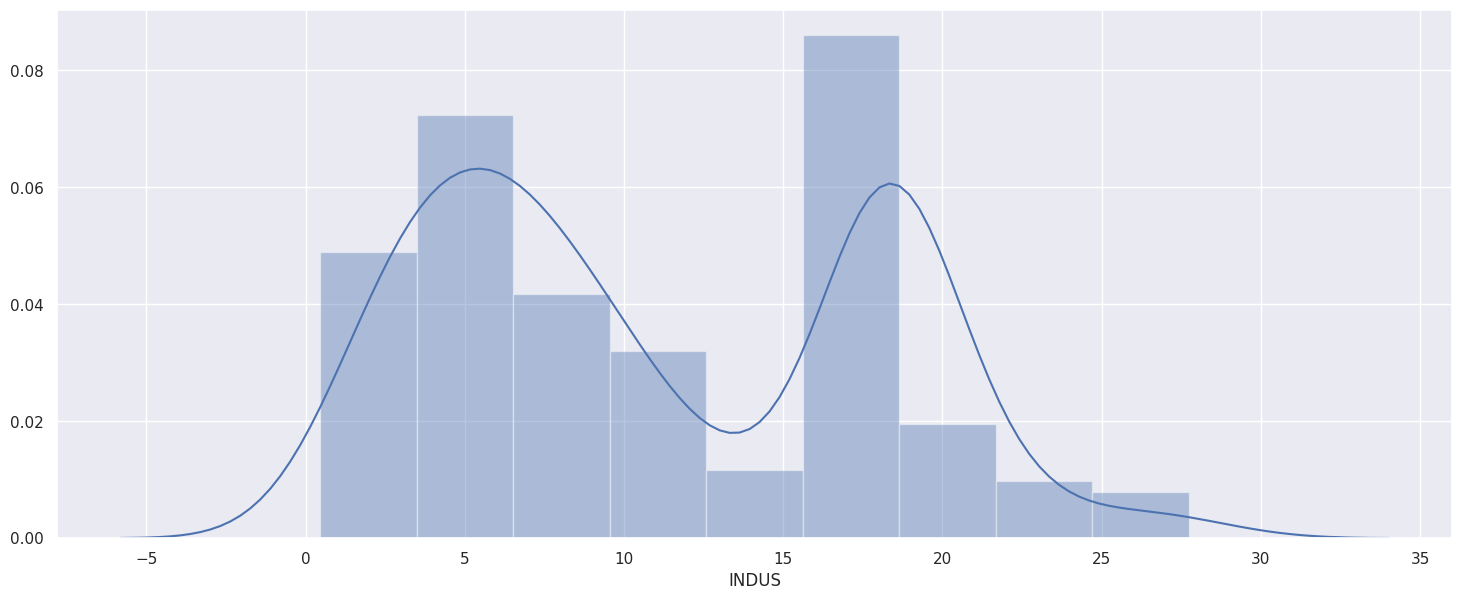

In [140]:
sb.distplot(features["INDUS"])

/home/abdulrehman/.local/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


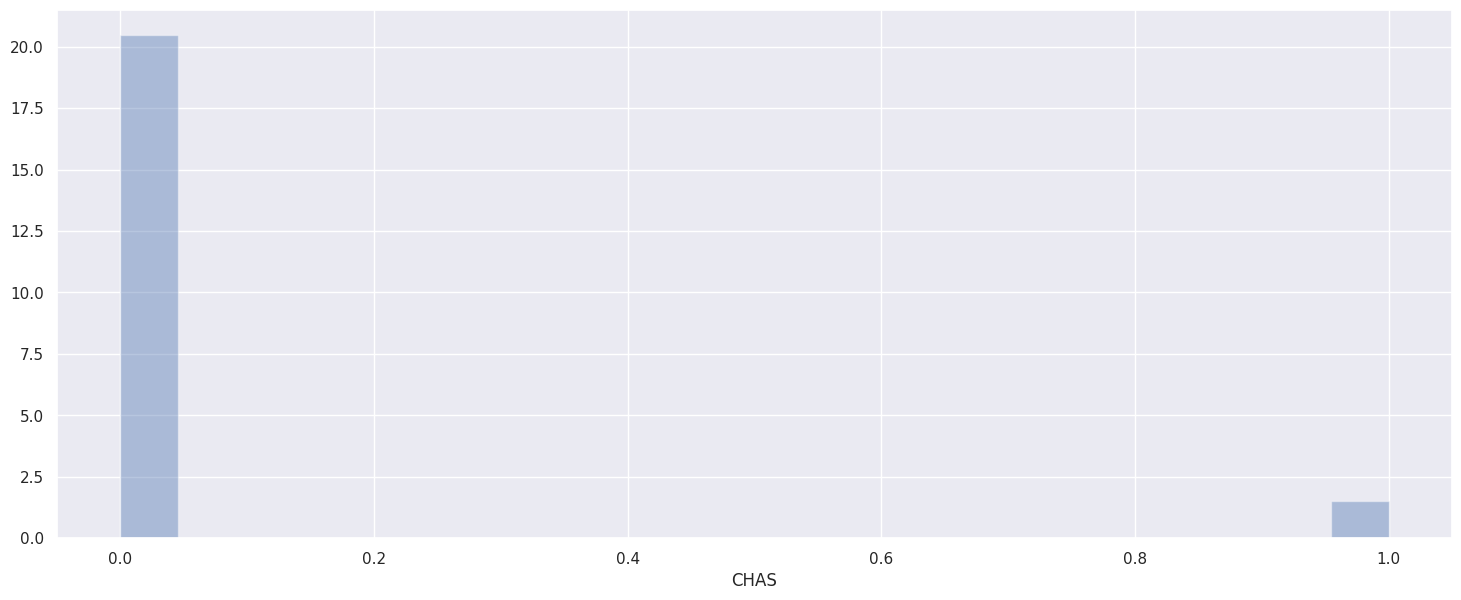

In [141]:
sb.distplot(features["CHAS"])

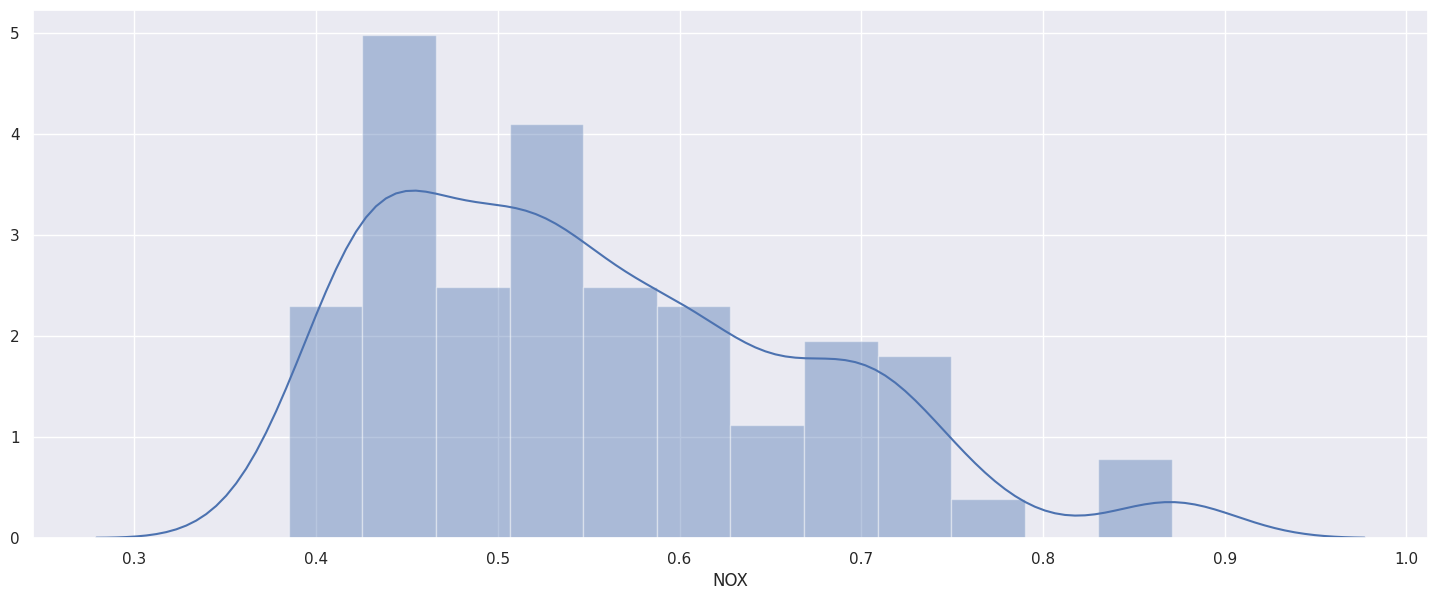

In [142]:
sb.distplot(features["NOX"])

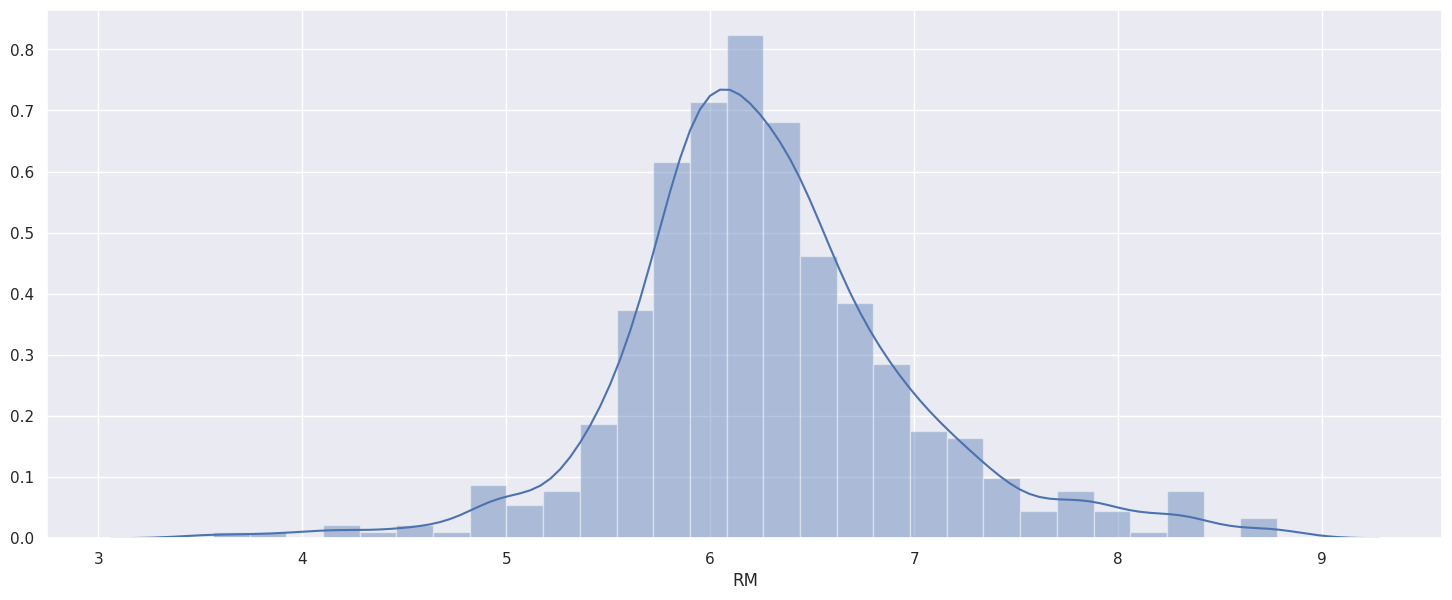

In [143]:
sb.distplot(features["RM"])

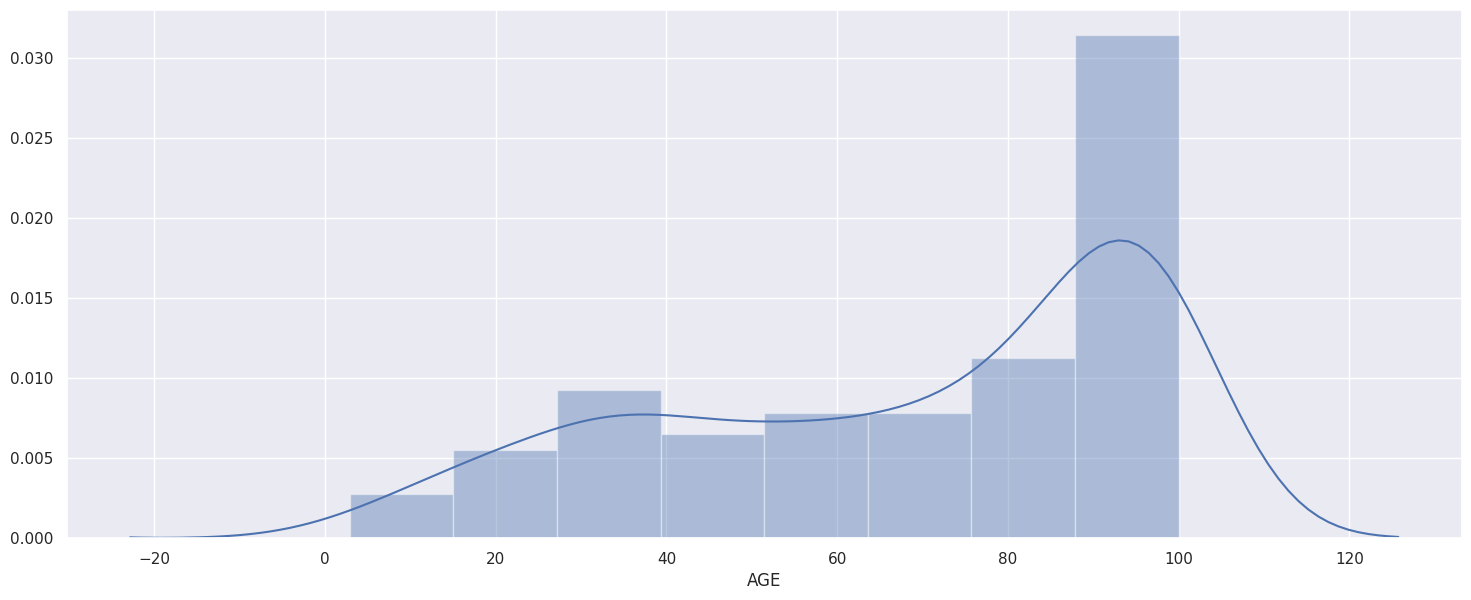

In [144]:
sb.distplot(features["AGE"])

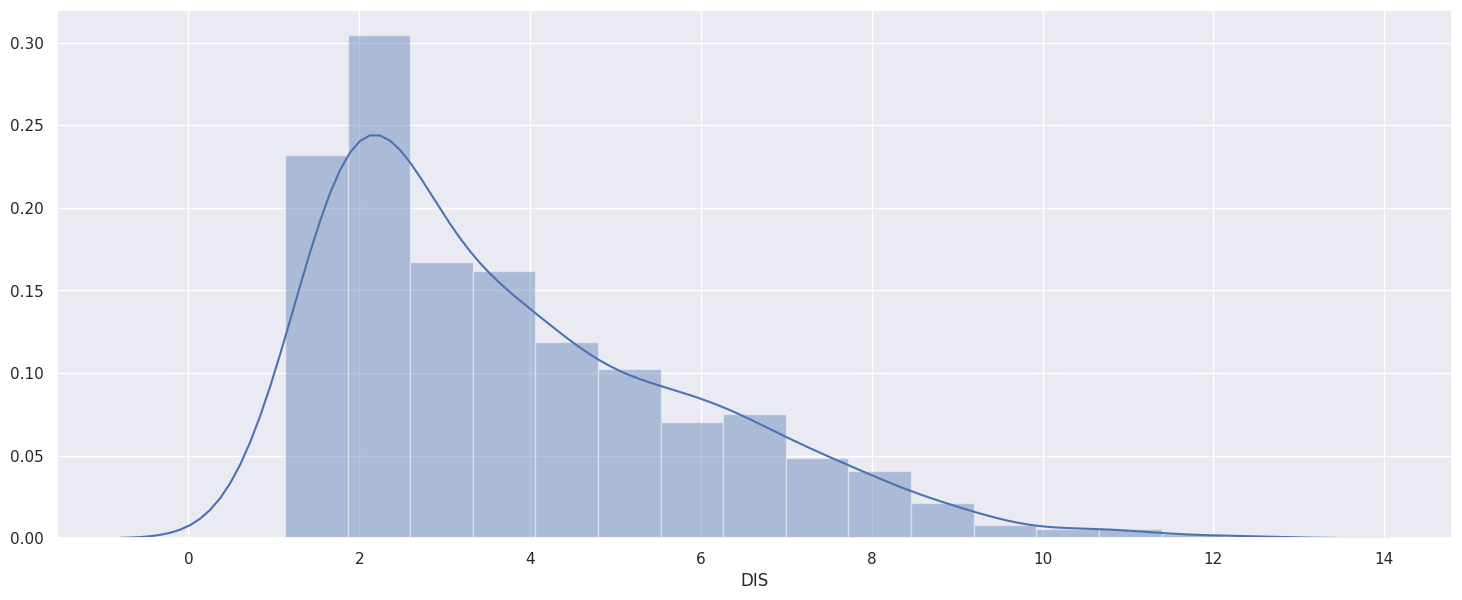

In [145]:
sb.distplot(features["DIS"])

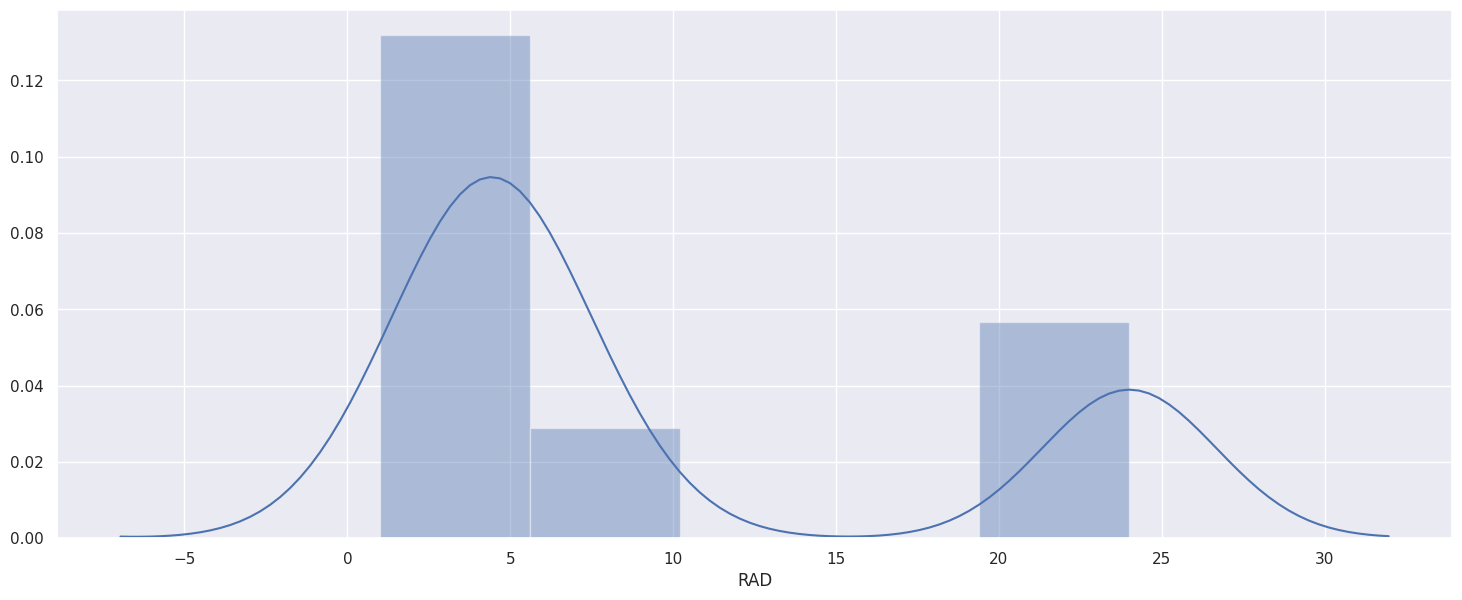

In [146]:
sb.distplot(features["RAD"])

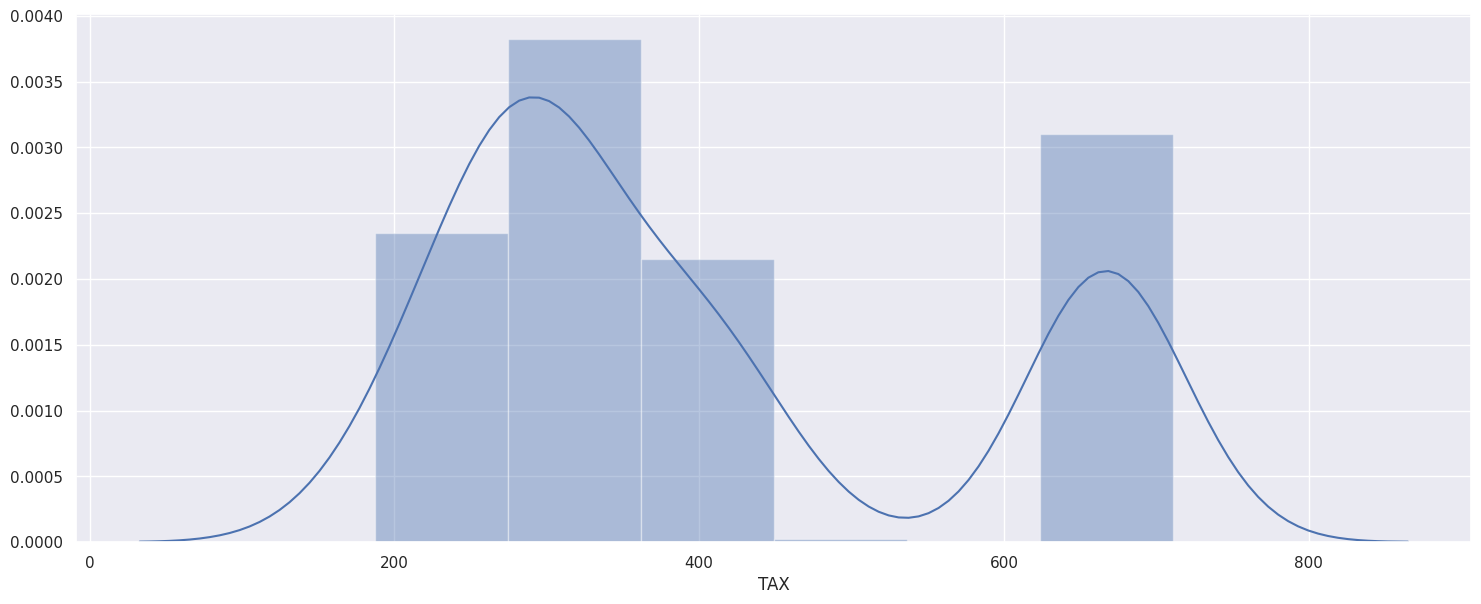

In [147]:
sb.distplot(features["TAX"])

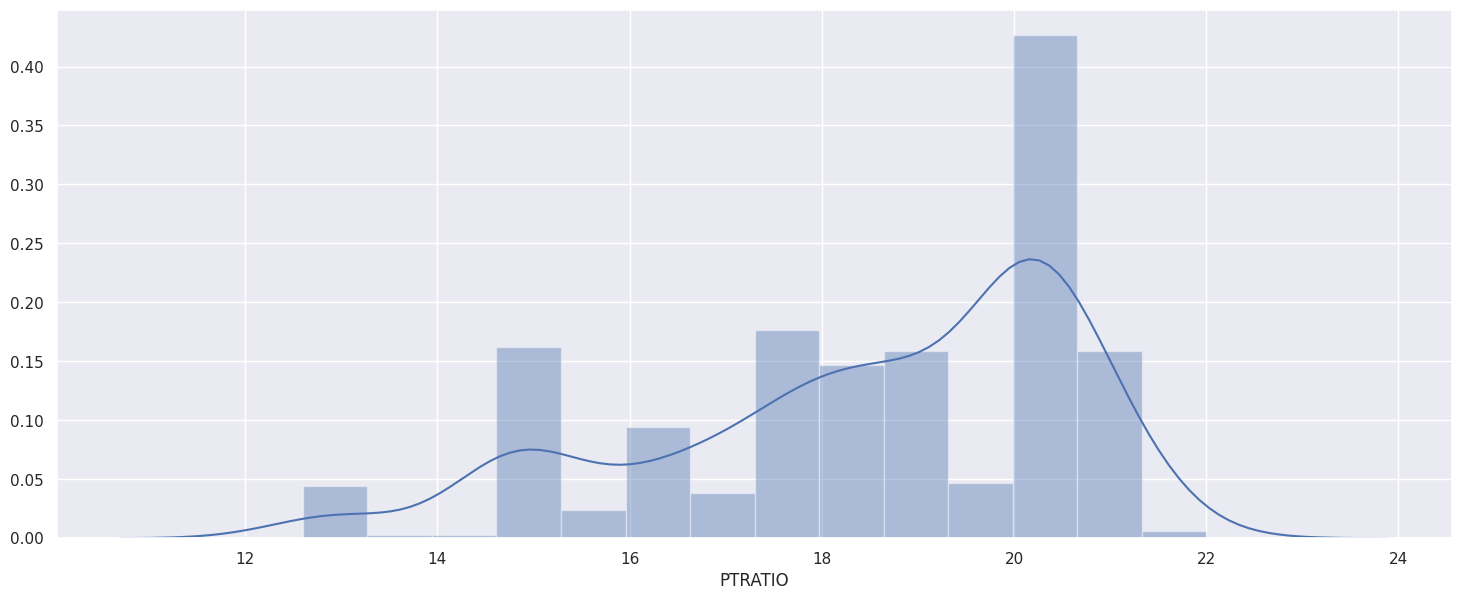

In [148]:
sb.distplot(features["PTRATIO"])

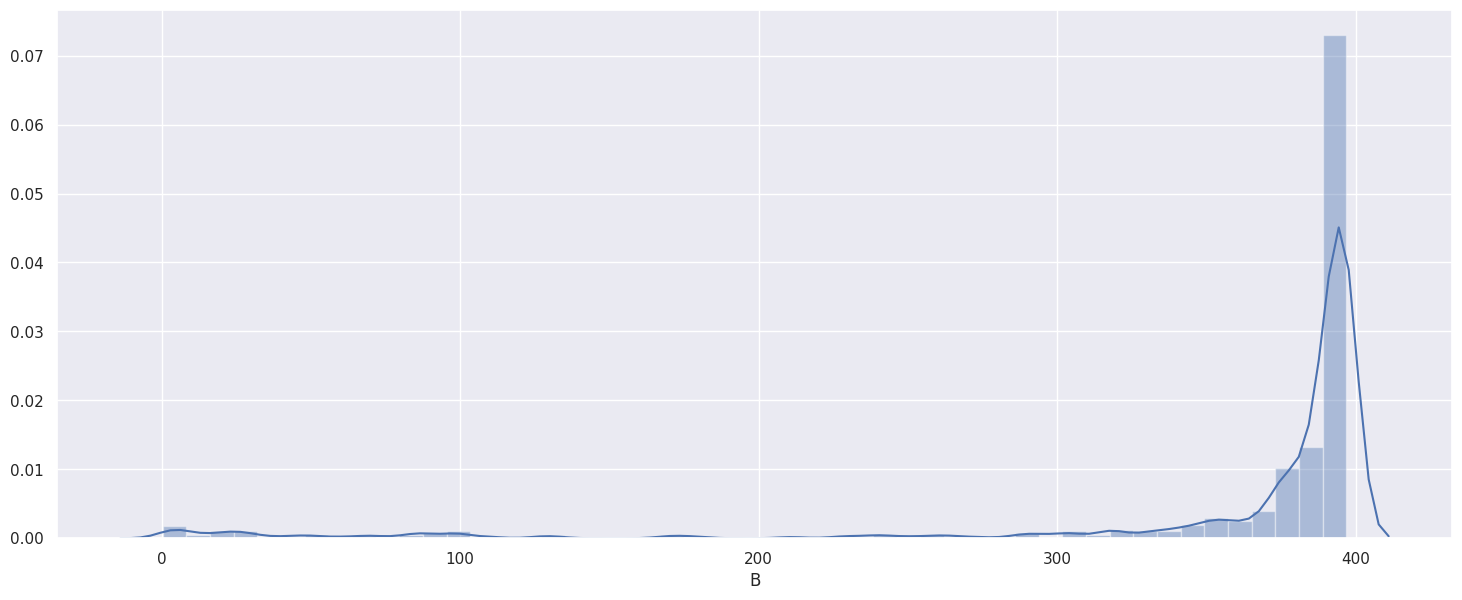

In [149]:
sb.distplot(features["B"])

## Box Plot
In the code segment below we will plot `Box Plots` by using `seaborn` library, these plots will help us to visualize the outliers in the dataset. As we have a relatively small dataset so we will not remove the outliers if we try to remove them then we don't have much dataset left to train the models.

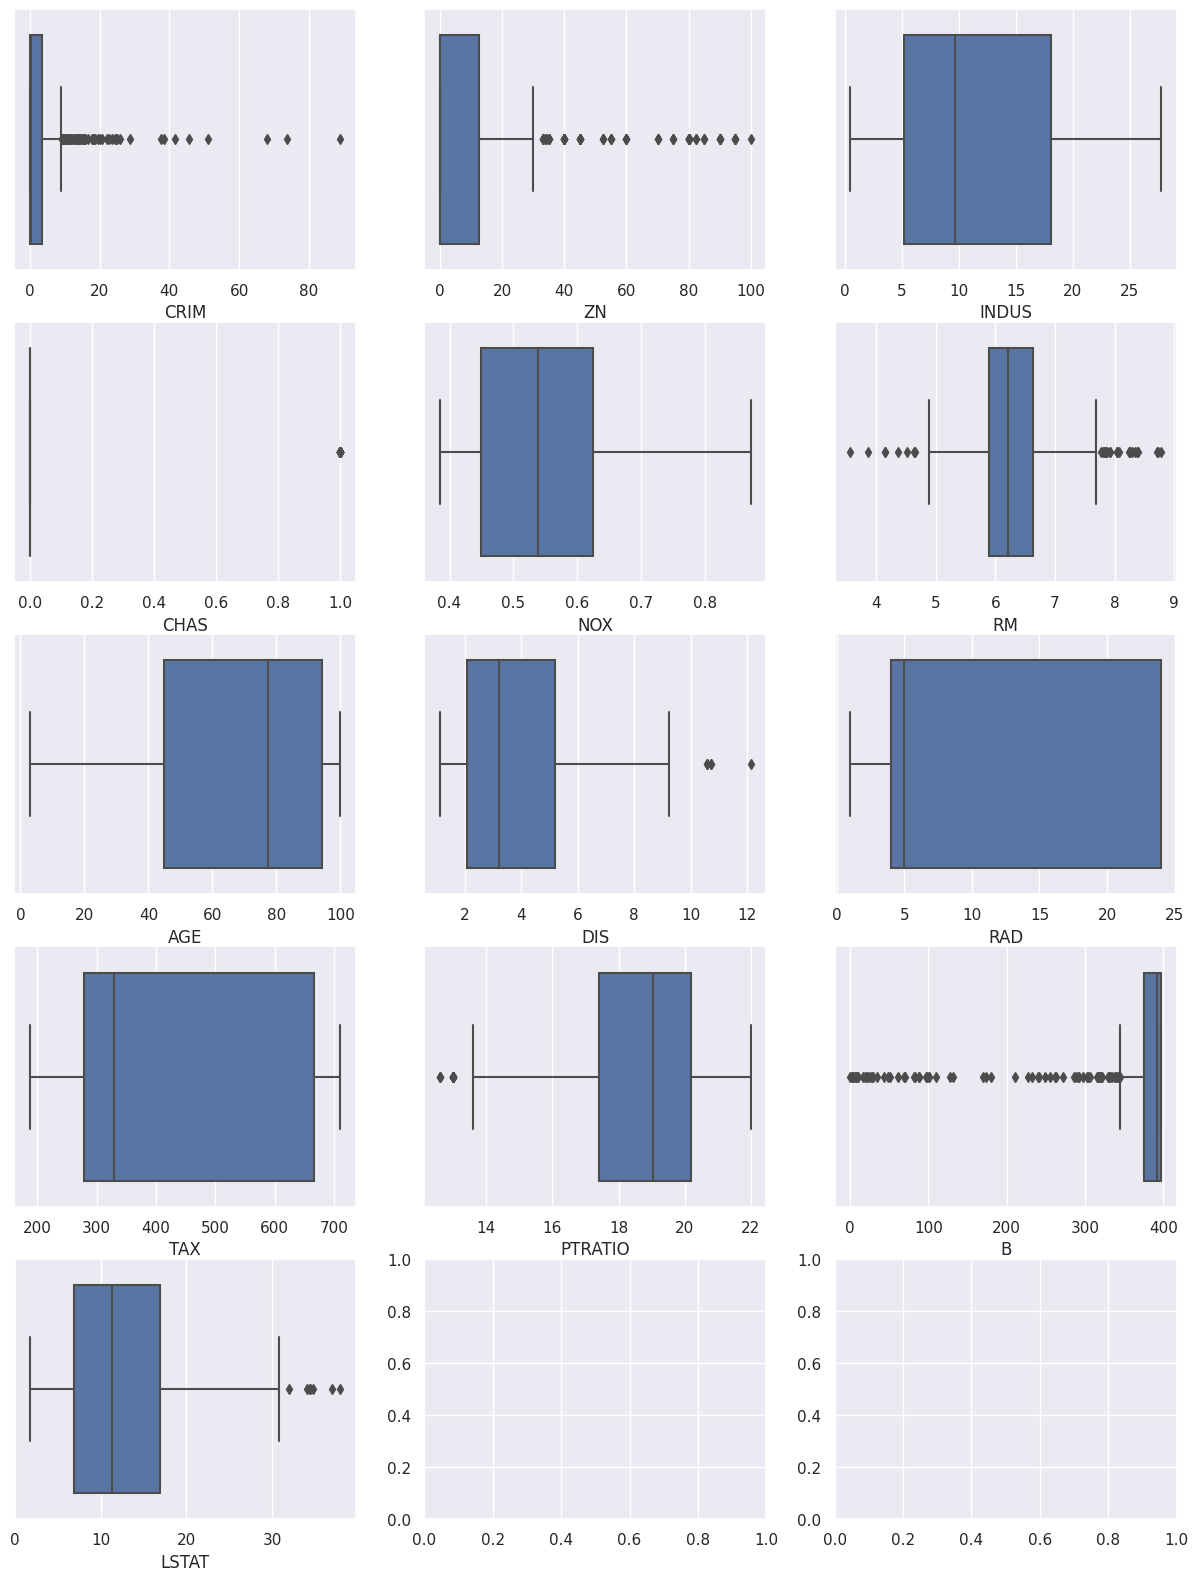

In [150]:
# Outliers Box Plot
columns = features.columns

fig, axes = plt.subplots(5,3,figsize=(15,20))

index = 0
for i in range(5):
    for j in range(3):
        sb.boxplot(x=columns[index], data=features, ax=axes[i, j])
        index = index + 1
        
        if index >= 13:
            break
        
    if index >= 13:
        break

## Finding Correlation Analysis - Part (e)
Finding correlations and selecting two attributes that have strong correlations with MDEV Value. 

In [151]:
# part (e)
correlation_analysis = boston_dataset.corr()

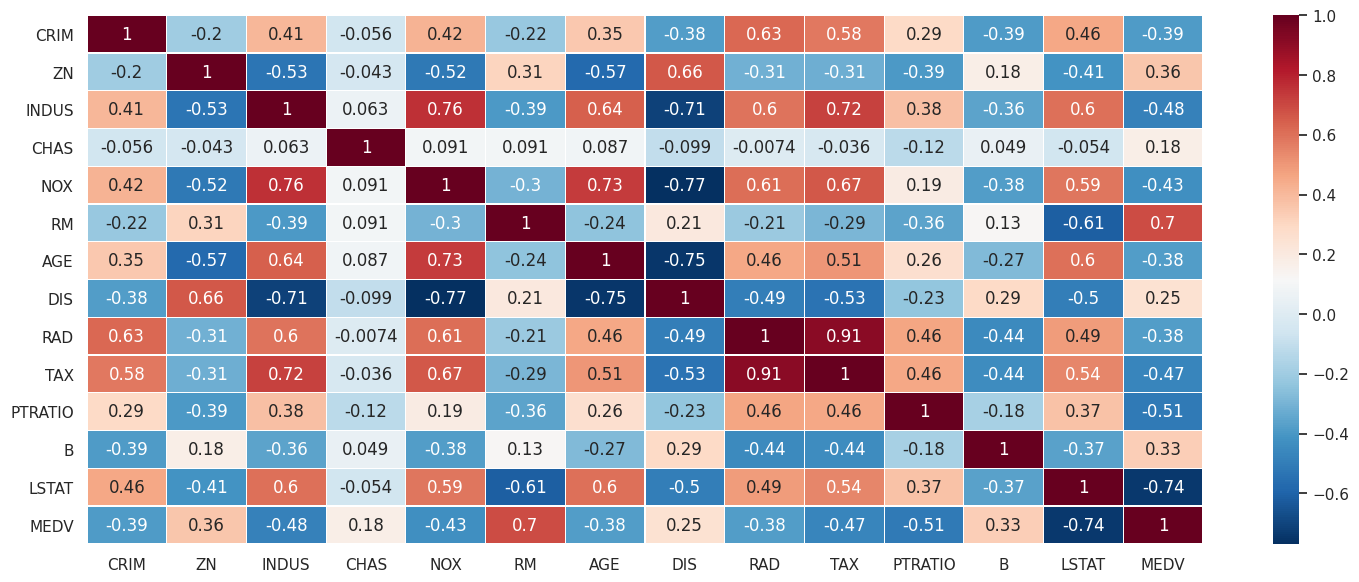

In [152]:
sb.set(rc={"figure.figsize":(18, 7)})
sb.heatmap(correlation_analysis,
           xticklabels=correlation_analysis.columns,
           yticklabels=correlation_analysis.columns,
           cmap="RdBu_r",
           annot=True,
           linewidth=0.1)

## Selected Attributes
After the correlation analysis we have selected the attributes given below:

- **ZN**
- **RM**

In [153]:
# Picking up 2 features ZN and RM from training dataset
model1_X_train = X_train["ZN"]
model1_X_test = X_test["ZN"]
model2_X_train = X_train["RM"]
model2_X_test = X_test["RM"]

## Scaling the training and testing dataset

In [162]:
min_max_scaler = preprocessing.MinMaxScaler()

# For model 1
model1_X_train = np.array(model1_X_train)
model1_X_train = np.reshape(model1_X_train, (-1, 1))
model1_X_train = min_max_scaler.fit_transform(model1_X_train)

model1_X_test = np.array(model1_X_test)
model1_X_test = np.reshape(model1_X_test, (-1, 1))
model1_X_test = min_max_scaler.fit_transform(model1_X_test)


# For model 2
model2_X_train = np.array(model2_X_train)
model2_X_train = np.reshape(model2_X_train, (-1, 1))
model2_X_train = min_max_scaler.fit_transform(model2_X_train)

model2_X_test = np.array(model2_X_test)
model2_X_test = np.reshape(model2_X_test, (-1, 1))
model2_X_test = min_max_scaler.fit_transform(model2_X_test)

## Training the dataset on Linear Regression Model
Now in the code segments below we will create 2 linear regression models and train the dataset on each of them.

In [163]:
from sklearn.linear_model import LinearRegression

In [164]:
linear_model1 = LinearRegression()
linear_model2 = LinearRegression()

In [165]:
linear_model1.fit(model1_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [166]:
linear_model2.fit(model2_X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [167]:
#Estimating house prices (Prediction on 20% dataset)
linear_model1_pred = linear_model1.predict(model1_X_test)
linear_model2_pred = linear_model2.predict(model2_X_test)

## Scatter Plot for tesst samples with a Regression Line

In [168]:
# Setting up figure size
plt.rcParams['figure.figsize'] = [4, 4]

Text(0, 0.5, 'Prices')

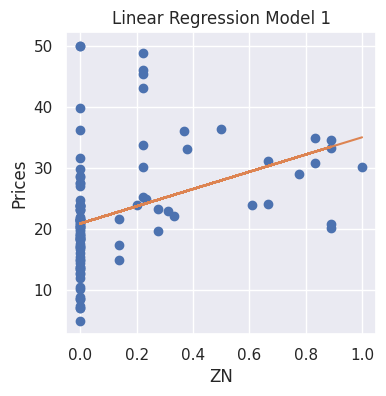

In [175]:
plt.plot(model1_X_test, y_test, 'o')
plt.plot(model1_X_test, linear_model1_pred)
plt.title("Linear Regression Model 1")
plt.xlabel("ZN")
plt.ylabel("Prices")

Text(0, 0.5, 'Prices')

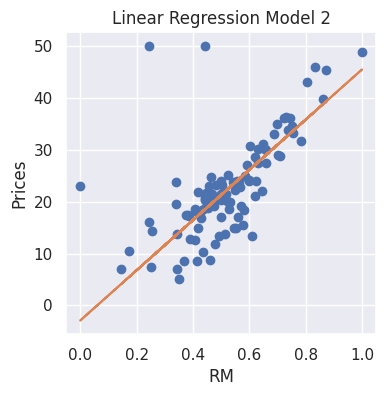

In [174]:
plt.plot(model2_X_test, y_test, 'o')
plt.plot(model2_X_test, linear_model2_pred)
plt.title("Linear Regression Model 2")
plt.xlabel("RM")
plt.ylabel("Prices")

## Scatter Plot - Part(H)
In the figure we can see the plot for predicted vs real values 

Text(0, 0.5, 'Predicted Prices')

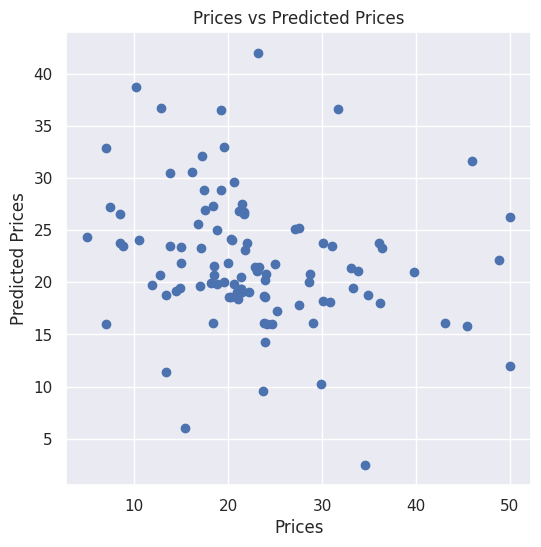

In [198]:
plt.rcParams['figure.figsize'] = [6, 6]
plt.plot(y_test, y_pred, 'o')
plt.title("Prices vs Predicted Prices")
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")

## Finding Coefficents and Intercepts for both models

In [176]:
print("Linear Model 1 Coefficent: ", linear_model1.coef_)
print("Linear Model 1 Intercept: ", linear_model1.intercept_)
print("----------------------")
print("Linear Model 2 Coefficent: ", linear_model2.coef_)
print("Linear Model 2 Intercept: ", linear_model2.intercept_)


Linear Model 1 Coefficent:  [14.13534192]
Linear Model 1 Intercept:  20.894574528254903
----------------------
Linear Model 2 Coefficent:  [48.39399603]
Linear Model 2 Intercept:  -2.9148292125956488


## Finding Mean Squared Error For Both Models

In [177]:
from sklearn.metrics import mean_squared_error

In [178]:
print("Mean Squared Error for Linear Model 1: ", mean_squared_error(y_test, linear_model1_pred))
print("Mean Squared Error for Linear Model 2: ", mean_squared_error(y_test, linear_model2_pred))

Mean Squared Error for Linear Model 1:  77.20282970998062
Mean Squared Error for Linear Model 2:  52.8412629483332


## Using KNN, Decision Tree and Random Forest Algorithm 

In [179]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

## KNN Algorithm

In [180]:
knn_model1 = KNeighborsRegressor()
knn_model2 = KNeighborsRegressor()

In [181]:
knn_model1.fit(model1_X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [182]:
knn_model2.fit(model2_X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [183]:
knn_predict_1 = knn_model1.predict(model1_X_test)
knn_predict_2 = knn_model2.predict(model2_X_test)

## Mean Squared error for KNN Models

In [184]:
print("Mean Squared error for First KNN model: ", mean_squared_error(y_test, knn_predict_1))
print("Mean Squared error for Second KNN model: ", mean_squared_error(y_test, knn_predict_2))

Mean Squared error for First KNN model:  97.12425882352942
Mean Squared error for Second KNN model:  46.61482745098038


## Decision Tree Algorithm

In [185]:
descision_model1 = DecisionTreeRegressor()
descision_model2 = DecisionTreeRegressor()

In [186]:
descision_model1.fit(model1_X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [187]:
descision_model2.fit(model2_X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [188]:
descison_pred1 = descision_model1.predict(model1_X_test)
descison_pred2 = descision_model2.predict(model2_X_test)

## Mean Squared Error for Decision Tree Models

In [189]:
print("Mean Squared error for First Decision Tree model: ", mean_squared_error(y_test, descison_pred1))
print("Mean Squared error for Second Decision Tree model: ", mean_squared_error(y_test, descison_pred2))

Mean Squared error for First Decision Tree model:  81.24856760614034
Mean Squared error for Second Decision Tree model:  89.90316721132898


## Random Forest Algorithm

In [190]:
random_forest_1 = RandomForestRegressor()
random_forest_2 = RandomForestRegressor()

In [191]:
random_forest_1.fit(model1_X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [192]:
random_forest_2.fit(model2_X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [193]:
random_pred1 = random_forest_1.predict(model1_X_test)
random_pred2 = random_forest_2.predict(model2_X_test)

In [194]:
print("Mean Squared error for First Random Forest model: ", mean_squared_error(y_test, random_pred1))
print("Mean Squared error for Second Random Forest model: ", mean_squared_error(y_test, random_pred2))

Mean Squared error for First Random Forest model:  79.67986023037882
Mean Squared error for Second Random Forest model:  59.398106841289156


## Comparing MSE for all models

In [197]:
print("---------------------------------------------------------------------------------------")
print("Mean Squared Error for Linear Model 1: ", mean_squared_error(y_test, linear_model1_pred))
print("Mean Squared Error for Linear Model 2: ", mean_squared_error(y_test, linear_model2_pred))
print("---------------------------------------------------------------------------------------")
print("Mean Squared Error for First KNN model: ", mean_squared_error(y_test, knn_predict_1))
print("Mean Squared Error for Second KNN model: ", mean_squared_error(y_test, knn_predict_2))
print("---------------------------------------------------------------------------------------")
print("Mean Squared Error for First Decision Tree model: ", mean_squared_error(y_test, descison_pred1))
print("Mean Squared Error for Second Decision Tree model: ", mean_squared_error(y_test, descison_pred2))
print("---------------------------------------------------------------------------------------")
print("Mean Squared Error for First Random Forest model: ", mean_squared_error(y_test, random_pred1))
print("Mean Squared Error for Second Random Forest model: ", mean_squared_error(y_test, random_pred2))

---------------------------------------------------------------------------------------
Mean Squared Error for Linear Model 1:  77.20282970998062
Mean Squared Error for Linear Model 2:  52.8412629483332
---------------------------------------------------------------------------------------
Mean Squared Error for First KNN model:  97.12425882352942
Mean Squared Error for Second KNN model:  46.61482745098038
---------------------------------------------------------------------------------------
Mean Squared Error for First Decision Tree model:  81.24856760614034
Mean Squared Error for Second Decision Tree model:  89.90316721132898
---------------------------------------------------------------------------------------
Mean Squared Error for First Random Forest model:  79.67986023037882
Mean Squared Error for Second Random Forest model:  59.398106841289156
